In [52]:
# 参考資料(https://qiita.com/fujin/items/7f0a7b6fc8fb662f510d)
# 線形回帰（単回帰、重回帰、リッジ回帰、Lasso回帰、ElasticNet回帰）

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('/home/yoshida/.pyenv/versions/3.6.6/lib/python3.6/site-packages')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score # R^2(決定係数)のスコアを出力
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # データをトレーニング用とテスト用に分割するためのライブラリ
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.preprocessing import StandardScaler # 標準化
from sklearn.linear_model import Ridge # リッジ回帰
from sklearn.linear_model import Lasso # Lasso回帰
from sklearn.linear_model import ElasticNet # ElasticNet

In [53]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
#「sep = \s+」は、もとのデータの区切りがスペースであり、スペースが複数個続いていることを示している
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PIRATIO','B','LSTAT','MEDV']
#カラムの名前を指定
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [54]:
# 回帰のグラフがトレーニングデータにどれだけ適合しているのかを可視化する「lin_regplot関数」を定義する
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

MAE = 4.46,  RMSE = 6.04,  score = 0.60
Coef =  [8.46109164]
Intercept = -30.571032410898336


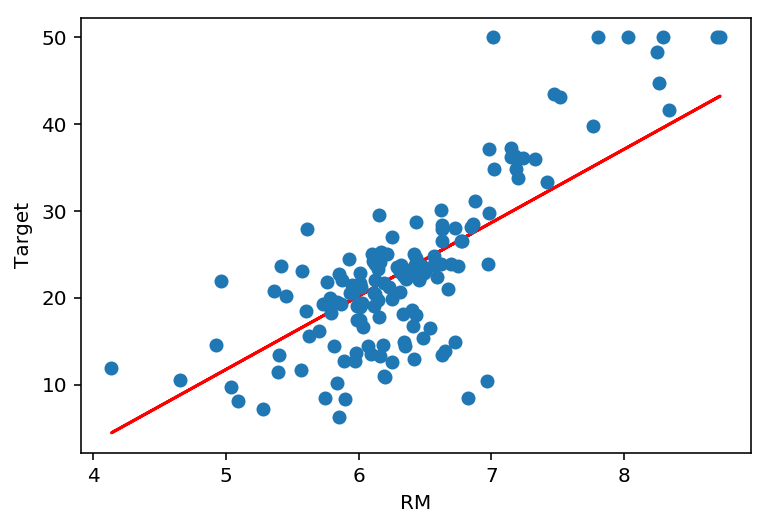

In [55]:
X = df[['RM']].values # 特徴量 (部屋数)
Y = df['MEDV'].values # 目的変数

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
# lr.fit()に「X_train(70%), Y_train(70%)」を入れて学習させて、予測モデルを作らせる

# 予測　
Y_pred = lr.predict(X_test)
# lr.predict()に「X_test(30%)」を入れて、作成した予測モデルに当てはめ、予測値を算出させる

# 評価
# 平均絶対誤差(MAE)
# トレーニングのy値と、予測値のy値の平均絶対誤差を算出
mae = mean_absolute_error(Y_test, Y_pred)

# 平方根平均二乗誤差（RMSE）
# トレーニングのy値と、予測値のy値の平方根平均二乗誤差を算出
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  

# スコア
score = lr.score(X_test, Y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

# lin_regplot(X_std, Y_std, lr)
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, Y_pred, "r-")
plt.plot(X_test, Y_test, "o")

'''
MAE = 4.46,  RMSE = 6.04,  score = 0.60
Coef =  [8.46109164] # 重みw
Intercept = -30.571032410898336 # バイアス
予測精度：60%
'''
plt.show()


In [56]:
# 上記は特徴量1であったが、今回は特徴量を13に変更
X = df.loc[:,['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PIRATIO', 'B', 'LSTAT']] # 特徴量 (部屋数)
Y = df['MEDV'].values # 目的変数
# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
# lr.fit()に「X_train(70%), Y_train(70%)」を入れて学習させて、予測モデルを作らせる

# 予測　
Y_pred = lr.predict(X_test)
# lr.predict()に「X_test(30%)」を入れて、作成した予測モデルに当てはめ、予測値を算出させる

# 評価
# 平均絶対誤差(MAE)
# トレーニングのy値と、予測値のy値の平均絶対誤差を算出
mae = mean_absolute_error(Y_test, Y_pred)

# 平方根平均二乗誤差（RMSE）
# トレーニングのy値と、予測値のy値の平方根平均二乗誤差を算出
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  

# スコア
score = lr.score(X_test, Y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

# lin_regplot(X_std, Y_std, lr)
'''plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, Y_pred, "r-")
plt.plot(X_test, Y_test, "o")'''

'''
MAE = 3.34,  RMSE = 4.45,  score = 0.78
Coef =  [-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]
Intercept = 46.39649387182362
予測精度：78%
予測精度が上記よりも若干上がっている
'''
# plt.show()


MAE = 3.34,  RMSE = 4.45,  score = 0.78
Coef =  [-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]
Intercept = 46.39649387182362


'\nMAE = 3.34,  RMSE = 4.45,  score = 0.78\nCoef =  [-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00\n -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00\n  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03\n -5.68834539e-01]\nIntercept = 46.39649387182362\n予測精度：78%\n予測精度が上記よりも若干上がっている\n'

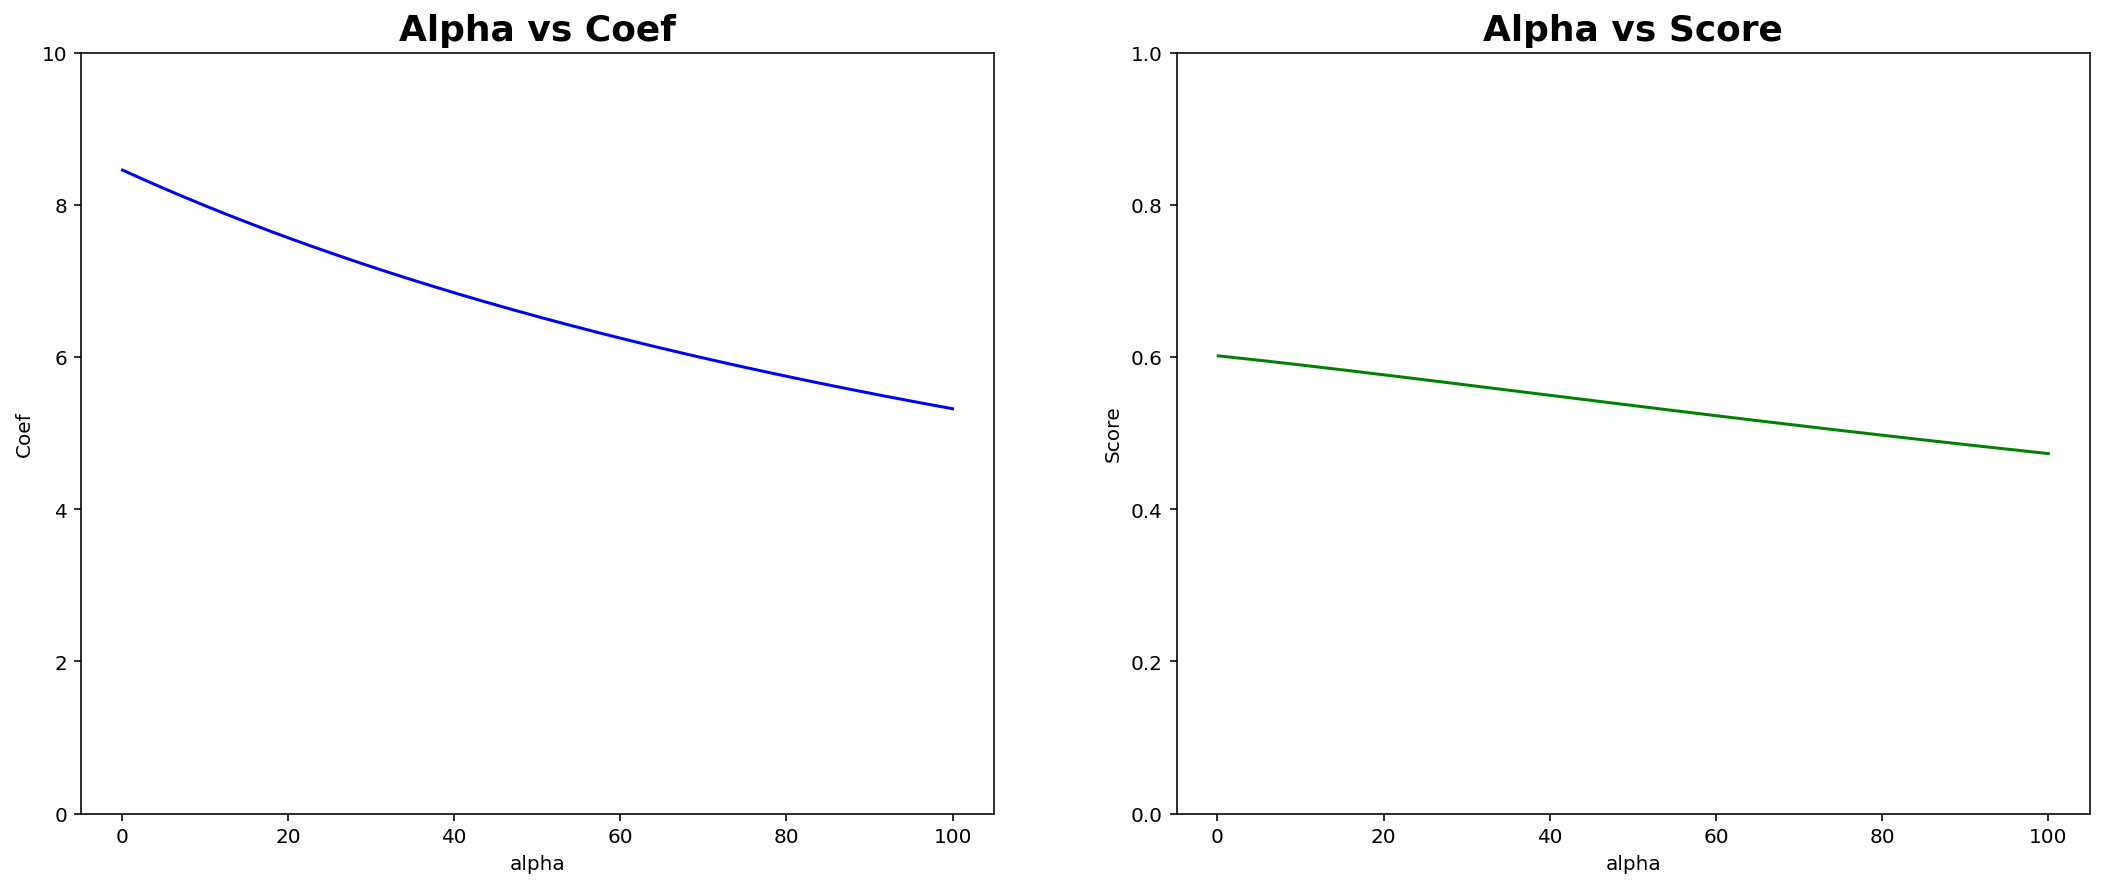

In [62]:
########################
#  リッジ回帰
########################

X = df[['RM']].values # 特徴量 (部屋数)
Y = df['MEDV'].values # 目的変数

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

list_alpha = [n*0.1 for n in range(1, 1001)]
list_coef = []
list_score = []
for alpha_val in list_alpha:
    # Ridge
    ridge = Ridge(alpha=alpha_val)
    ridge.fit(X_train, Y_train)

    # 予測　
    Y_pred = ridge.predict(X_test)

    # スコア
    score = ridge.score(X_test, Y_test)
    list_coef.append(ridge.coef_)
    list_score.append(score)
    

  

plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
plt.title("Alpha vs Coef", fontweight="bold", size=18)
plt.xlabel("alpha")
plt.ylabel("Coef")
plt.ylim(0, 10)
plt.plot(list_alpha, list_coef, "-b")

plt.subplot(1, 2, 2)
plt.title("Alpha vs Score", fontweight="bold", size=18)
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.plot(list_alpha, list_score, "-g")
plt.show()

In [63]:
########################
# Lasso
########################

X = df.loc[:,['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PIRATIO', 'B', 'LSTAT']] # 特徴量 (部屋数)
Y = df['MEDV'].values # 目的変数

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

coef_list = []
alpha_list = [0.1, 1.0, 10]
for alpha_val in alpha_list: # alpha値：初期値1.0
    # Ridge
    lasso = Lasso(alpha=alpha_val)
    lasso.fit(X_train, Y_train)

    # 予測　
    Y_pred = lasso.predict(X_test)

    #
    # 評価
    #
    # 平均絶対誤差(MAE)
    mae = mean_absolute_error(Y_test, Y_pred)
    # 平方根平均二乗誤差（RMSE）
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    # スコア
    score = lasso.score(X_test, Y_test)

    coef_list.append(lasso.coef_)

    print("[alpha=%.1f] MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (alpha_val, mae, rmse, score))
    print("            Coef =", lasso.coef_)
    print("            Intercept =", lasso.intercept_)
    print("            Number without the Weight =", np.sum(lasso.coef_ == 0))

[alpha=0.1] MAE = 3.34,  RMSE = 4.50,  score = 0.78
            Coef = [-0.07989188  0.06378989 -0.02637228  0.89488532 -0.          2.78861531
 -0.00981237 -1.15727222  0.26641308 -0.0140787  -0.75496628  0.0077946
 -0.61309592]
            Intercept = 32.07589998522777
            Number without the Weight = 1
[alpha=1.0] MAE = 3.90,  RMSE = 5.50,  score = 0.67
            Coef = [-0.05256765  0.05904289 -0.          0.         -0.          0.
  0.01964989 -0.5767539   0.23300934 -0.01230686 -0.72109227  0.00600289
 -0.79711475]
            Intercept = 46.99085865910985
            Number without the Weight = 4
[alpha=10.0] MAE = 4.63,  RMSE = 6.70,  score = 0.51
            Coef = [-0.          0.03807157 -0.          0.         -0.          0.
  0.         -0.          0.         -0.00735017 -0.          0.00633929
 -0.55786345]
            Intercept = 29.880055995043115
            Number without the Weight = 9


In [64]:
########################
# ElasticNet
########################

X = df.loc[:,['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PIRATIO', 'B', 'LSTAT']] # 特徴量 (部屋数)
Y = df['MEDV'].values # 目的変数

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

coef_list = []
alpha_list = [0.1, 1.0, 10]
for alpha_val in alpha_list: # alpha値：初期値1.0
    # Ridge
    lasso = ElasticNet(alpha=alpha_val)
    lasso.fit(X_train, Y_train)

    # 予測　
    Y_pred = lasso.predict(X_test)

    #
    # 評価
    #
    # 平均絶対誤差(MAE)
    mae = mean_absolute_error(Y_test, Y_pred)
    # 平方根平均二乗誤差（RMSE）
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    # スコア
    score = lasso.score(X_test, Y_test)

    coef_list.append(lasso.coef_)

    print("[alpha=%.1f] MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (alpha_val, mae, rmse, score))
    print("            Coef =", lasso.coef_)
    print("            Intercept =", lasso.intercept_)
    print("            Number without the Weight =", np.sum(lasso.coef_ == 0))

[alpha=0.1] MAE = 3.36,  RMSE = 4.55,  score = 0.77
            Coef = [-0.08337353  0.06520361 -0.03112137  0.95519576 -0.29843632  2.48408414
 -0.00785037 -1.16772471  0.27740196 -0.01424456 -0.77598978  0.00759023
 -0.63078505]
            Intercept = 34.74804922770532
            Number without the Weight = 0
[alpha=1.0] MAE = 3.73,  RMSE = 5.25,  score = 0.70
            Coef = [-0.06892062  0.06229229 -0.          0.         -0.          0.60621493
  0.01506499 -0.69022698  0.26553588 -0.01387045 -0.71551352  0.00639852
 -0.75468341]
            Intercept = 43.50488736371213
            Number without the Weight = 3
[alpha=10.0] MAE = 4.59,  RMSE = 6.64,  score = 0.52
            Coef = [-0.          0.0449933  -0.          0.         -0.          0.
  0.00303218 -0.          0.         -0.00646393 -0.          0.00621868
 -0.60484623]
            Intercept = 29.882074102009856
            Number without the Weight = 8
